In [23]:
import numpy as np
import pandas as pd
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
# Set default Seaborn style
sns.set()

In [143]:
#Import the iris dataset from sklearn
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris.feature_names + ['target'])

## cleanup a few things

In [127]:
data.head()
#iris.feature_names

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [128]:
# Let's rename columns to a format that is easier to work with
data.columns = [column.replace(' ', '_').replace('_(cm)','') for column in data.columns]
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
target          150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


Let's Add Species column:    
*0 - setosa *    
*1 - versicolor *    
*2- virginica *
- convert **target** into category
- create **species** column by renaming the target cats 

In [130]:
data['target'] = data.target.astype('category')
data['species'] = data.target.cat.rename_categories(['setosa', 'versicolor', 'virginica' ])

In [135]:
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,target,species
26,5.0,3.4,1.6,0.4,0.0,setosa
107,7.3,2.9,6.3,1.8,2.0,virginica
117,7.7,3.8,6.7,2.2,2.0,virginica
39,5.1,3.4,1.5,0.2,0.0,setosa
32,5.2,4.1,1.5,0.1,0.0,setosa


-------
### histogram 
of Versicolor petal lengths

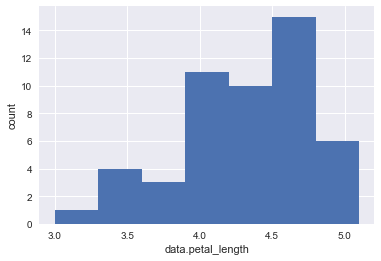

In [76]:
# Plot histogram of versicolor petal lengths
# Firt let's customize the number of bins = sqrt of data point available
n_bins = int(np.sqrt(len(data.petal_length[data.target == 1.0]))) # 7
plt.hist(data.petal_length[data.target == 1.0], bins = n_bins)
# Label axes
plt.xlabel('data.petal_length')
plt.ylabel('count')
# Show histogram
plt.show()


### Note to:
- whatch out for **binning bias** when using histogram      
- to remedy use bee swarming plot

### Bee Swarming plot

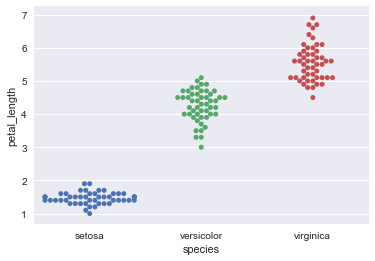

In [141]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x = 'species', y = 'petal_length', data = data, )
_ = plt.xlabel('species')
_ = plt.ylable = ('petal length')
plt.show()


### Note that: 
- for lots of data you might run into overlap and therefore **obfuscating** data. So beeswarm is not always the best option.   
- Use CDF!!!  They are great:   
    - show all the data and how it is distributed. 
    - great as a starting point during the EDA.
- or use box and whiskers plots.    
   
   
### CDF   
    
    

In [57]:
# Let's write a function that returns x and y for our CDF
def ecdf(data):
    """Compute CDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

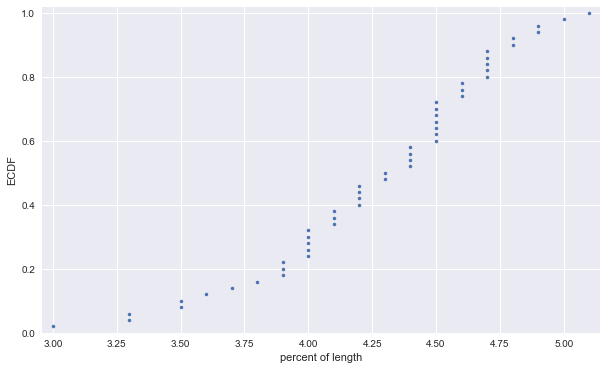

In [87]:
plt.figure(figsize = (10, 6))
# Compute CDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(data.petal_length[data.target == 1.0])

# Generate plot
plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')

# Make the margins nice
plt.margins(0.02)

plt.xlabel('percent of length')
plt.ylabel('ECDF') 
plt.show()

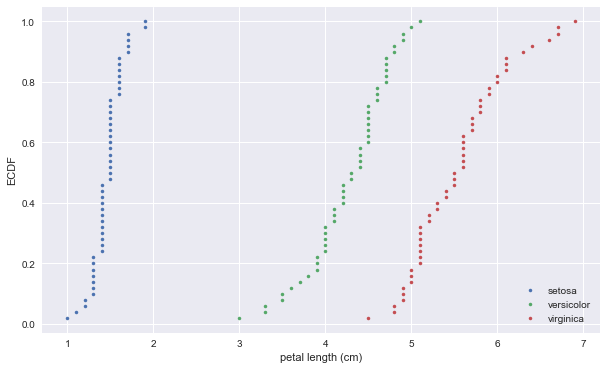

In [86]:
plt.figure(figsize = (10, 6))
# Compute CDFs
x_set, y_set = ecdf(data.petal_length[data.target == 0.0])
x_vers , y_vers = ecdf(data.petal_length[data.target == 1.0])
x_virg, y_virg = ecdf(data.petal_length[data.target == 2.0])


# Plot all CDFs on the same plot
plt.plot(x_set, y_set, marker='.', linestyle='none')
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.plot(x_virg, y_virg, marker='.', linestyle='none')


# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

In [79]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(data.petal_length[data.target == 1.0], percentiles)

print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


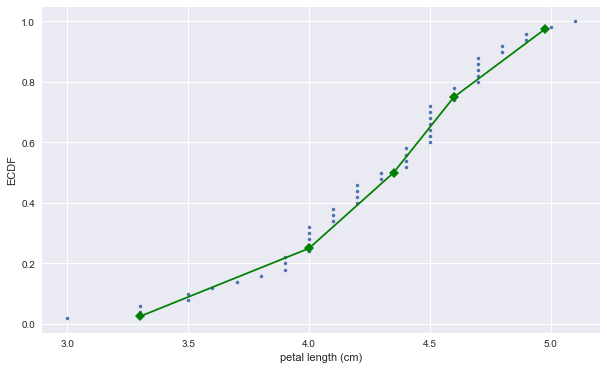

In [85]:
# Plot the ECDF
plt.figure(figsize = (10, 6))
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='green', linestyle=None)

plt.show()

-----

### Box and Whiskers Plot
Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine. Doing it just for practicing purposes.

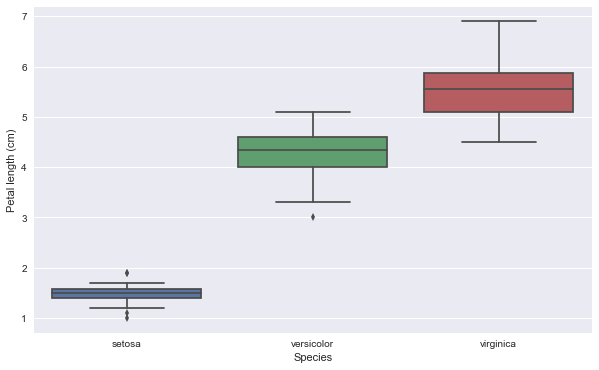

In [142]:
plt.figure(figsize = (10, 6))
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x = 'species' , y = 'petal_length', data = data)

_ = plt.xlabel('Species')
_ = plt.ylabel('Petal length (cm)')
plt.show()


### covariance and p correlation

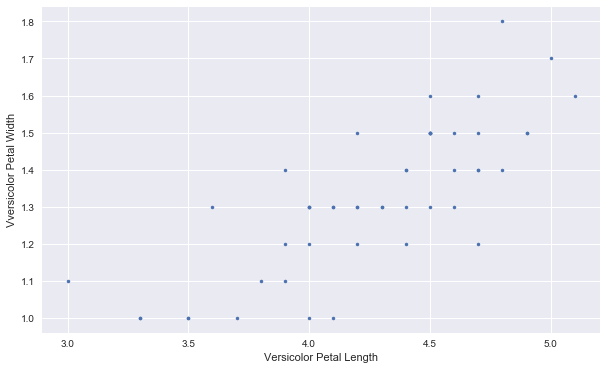

In [94]:
plt.figure(figsize = (10, 6))
# Make a scatter plot
_ = plt.plot(data.petal_length[data.target == 1.0], data.petal_width[data.target == 1.0], marker='.', linestyle='none')
_ = plt.xlabel('Versicolor Petal Length')
_ = plt.ylabel('Vversicolor Petal Width')

plt.show()

In [99]:
versicolor_petal_length, \
versicolor_petal_width = data.petal_length[data.target == 1.0], data.petal_width[data.target == 1.0]

In [100]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0, 1]
print(petal_cov)

#[var in x, cov]
#[cov, var in y]

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


the Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance.     
It is computed using the np.corrcoef() function.     
Like np.cov(), it takes two arrays as arguments and returns a 2D array.    

In [101]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


--------
## Probabilistic Logic and Statistical Inference
- Statistical inference involves taking your data to probabilistic conclusions about what you would expect with larger amounts of data       
- you can make decisions based on these conclusions

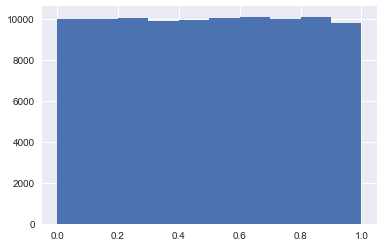

In [144]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()


_ = plt.hist(random_numbers)

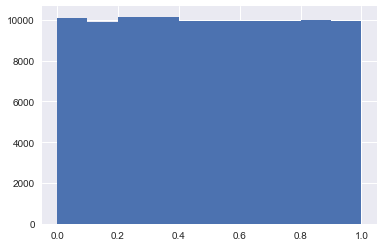

In [147]:
random_numbers2 = [np.random.random() for i in range(100000)]
_ = plt.hist(random_numbers2)

Let's simulate 100 Bernoulli trials 1000 times, where probability of each trial is 0.05    
(ex: simulate mortgage default)
- first write a function that retunrs P(success) with *number* and *probability* arguments
- simulate 100 Bernoulli's 1000 times and plot

In [148]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0


    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()


        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success +=1

    return n_success

/Users/cristina/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


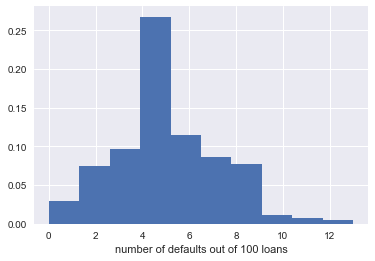

In [157]:
# Seed random number generator for reproducible results
np.random.seed(49) 

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; 
_ = plt.hist(n_defaults, normed = True)
_ = plt.xlabel('number of defaults out of 100 loans')
plt.show()

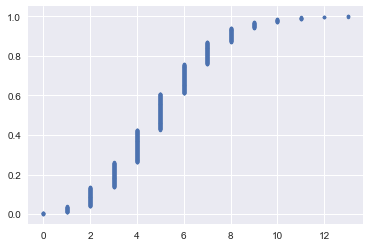

Probability of losing money = 0.03


In [158]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >=10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

As we might expect, we most likely get 5% defaults.     
But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

### Sampling out of the Binomial distribution
Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial().

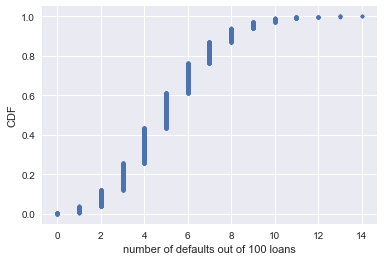

In [160]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(100, 0.05, size = 10000)

# Compute and plotCDF: x, y
x, y = ecdf(n_defaults)

_ = plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('CDF')
plt.show()

/Users/cristina/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


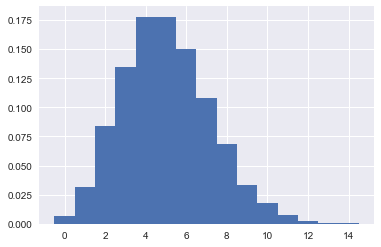

In [161]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, bins = bins, normed = True)

plt.xlabel('')
plt.ylabel('')
plt.show()


### Relationship between Binomial and Poisson distributions
Poisson distribution is a limit of the Binomial distribution for rare events.   


In [162]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size = 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      9.9806 3.16471541216584
n = 20 Binom: 9.9876 2.234109719776538
n = 100 Binom: 10.0341 2.997021386310081
n = 1000 Binom: 9.9897 3.105445847217433


Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?


In [163]:
# Draw 10,000 samples out of Poisson distribution
n_nohitters = np.random.poisson(251/115, size = 10000)

# Compute number of samples that are seven or greater
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more
p_large = n_large/10000

print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0067
